In [57]:
import pandas as pd
import joblib

# Load model, scaler, threshold
model = joblib.load("../models/fraud_model.pkl")
scaler = joblib.load("../models/scaler.pkl")

# Load raw data
df = pd.read_csv("../data/creditcard.csv")


In [58]:
fraud_df = df[df["Class"] == 1].drop("Class", axis=1)
fraud_df.shape


(492, 30)

In [59]:
fraud_scaled = scaler.transform(fraud_df)


In [60]:
fraud_probs = model.predict_proba(fraud_scaled)[:,1]


In [61]:
import numpy as np

print("Min:", fraud_probs.min())
print("Mean:", fraud_probs.mean())
print("Median:", np.median(fraud_probs))
print("Max:", fraud_probs.max())


Min: 0.004580900142031257
Mean: 0.8831577701253424
Median: 0.9795745003847084
Max: 0.9996037736820564


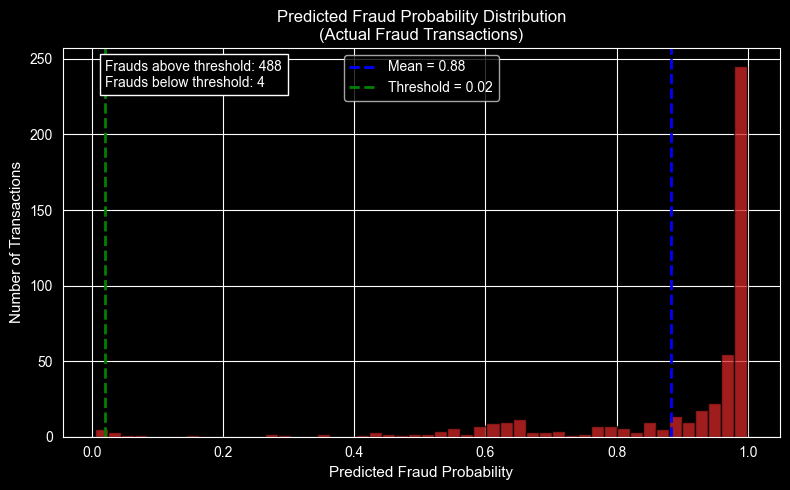

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,5))

# Histogram
plt.hist(
    fraud_probs,
    bins=50,
    color="#d62728",
    alpha=0.75,
    edgecolor="black"
)

# Reference lines
plt.axvline(
    np.mean(fraud_probs),
    color="blue",
    linestyle="--",
    linewidth=2,
    label=f"Mean = {np.mean(fraud_probs):.2f}"
)

plt.axvline(
    threshold,
    color="green",
    linestyle="--",
    linewidth=2,
    label=f"Threshold = {threshold}"
)

# Labels and title
plt.title("Predicted Fraud Probability Distribution\n(Actual Fraud Transactions)", fontsize=12)
plt.xlabel("Predicted Fraud Probability", fontsize=11)
plt.ylabel("Number of Transactions", fontsize=11)

# Annotation
plt.text(
    0.02,
    plt.ylim()[1]*0.9,
    f"Frauds above threshold: {(fraud_probs >= threshold).sum()}\n"
    f"Frauds below threshold: {(fraud_probs < threshold).sum()}",
    fontsize=10,
    bbox=dict(facecolor="black", alpha=1)
)

plt.legend()
plt.tight_layout()
# plt.savefig("fraud_separation.png", dpi=1000)
plt.show()


In [63]:
threshold = joblib.load("../models/threshold.pkl")

below = (fraud_probs < threshold).sum()
above = (fraud_probs >= threshold).sum()

below, above


(np.int64(4), np.int64(488))